In [1]:
import h5py

import pywt
import wavelets

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from kpnet.cluster import *
from kpnet.handler import *
from kpnet.network import *
from kpnet.signal import *
from kpnet.callback import *
from kpnet.entropy import *

In [2]:
N = 64
time_interval = 2 ** 16
chunk = 2 ** 13

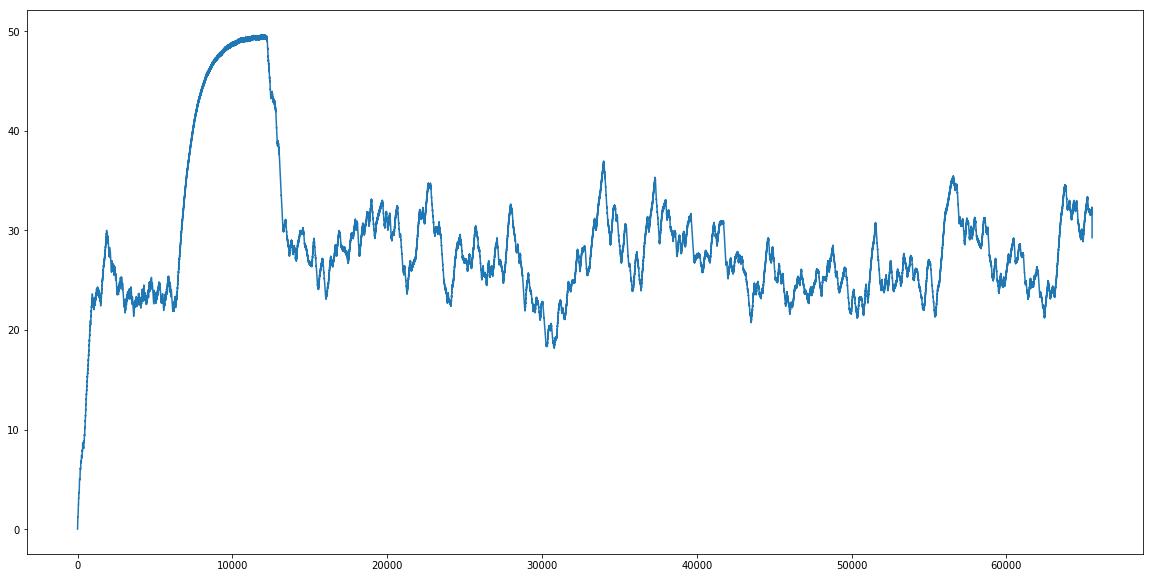

In [3]:
W = h5py.File('data/hfd5/cluster1.hfd5', 'r')['W']

plt.figure(figsize=(20, 10))
plt.plot(W[25, 23])
plt.show()

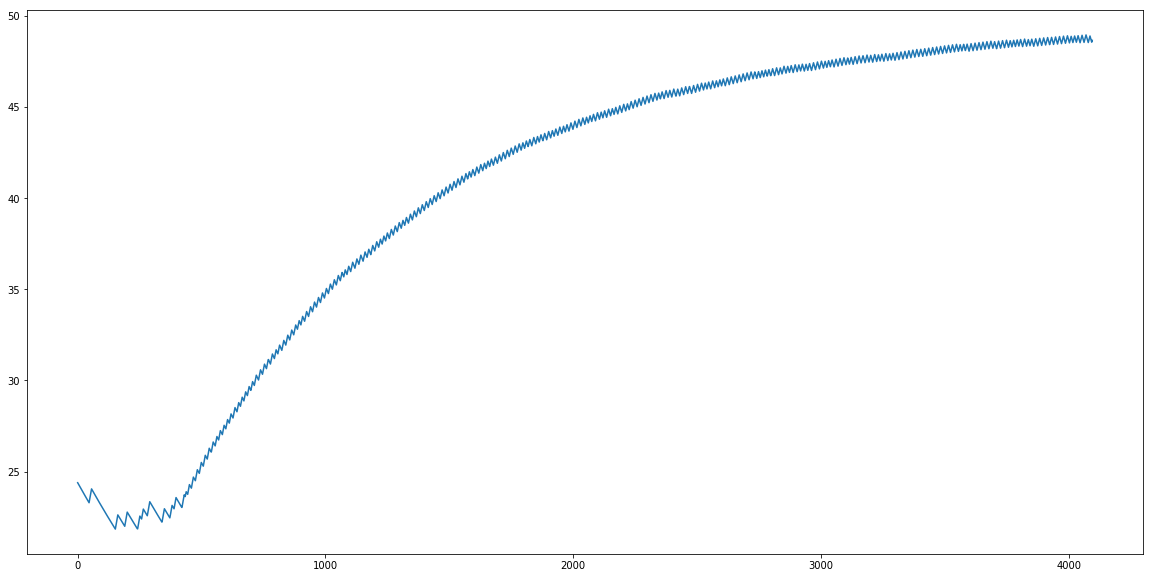

In [4]:
begin = 6000
end   = 10096
pattern = W[25, 23, begin : end]

plt.figure(figsize=(20, 10))
plt.plot(pattern)
plt.show()

In [5]:
wtc = WTClustering(W, pattern, CWTDistribution, wavelets.Ricker())
%time clusters = wtc.run(begin, end, epsilon=0.003, delta=0.005)

CPU times: user 6min 2s, sys: 1.21 s, total: 6min 4s
Wall time: 6min 5s


In [6]:
clusters

[[3, 5, 11, 13, 29, 31, 34, 36, 42, 0], [12, 58, 8], [25, 23]]

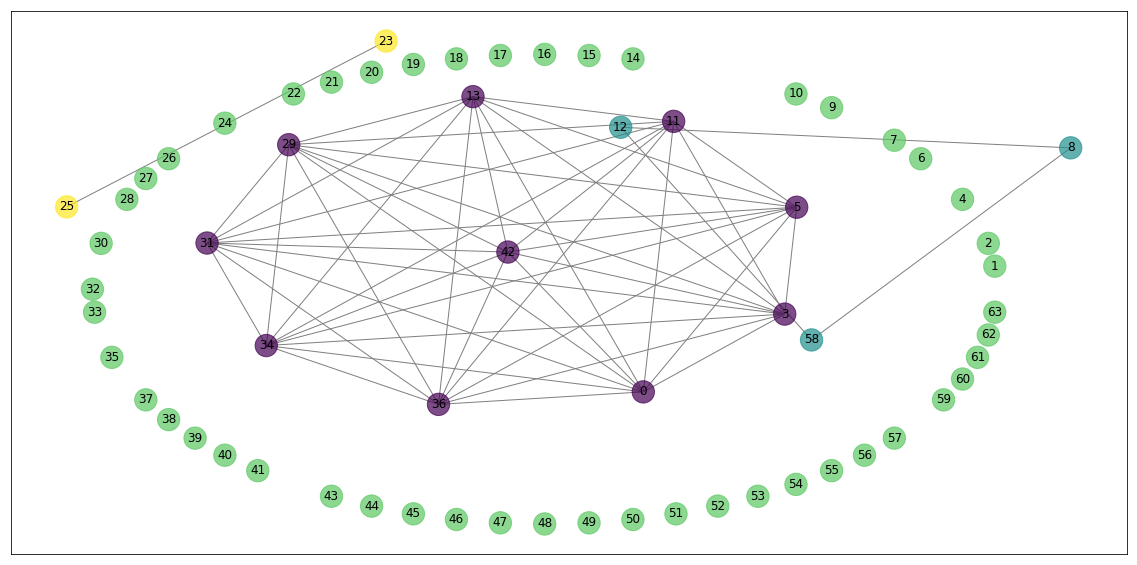

In [7]:
wtc.plot((20, 10))